In [47]:
import pandas as pd
import keras
import numpy as np
import os, random
import tensorflow as tf
import matplotlib.pyplot as plt

x_train = pd.read_csv("/content/spam_train.csv")
y_train = pd.read_csv('/content/spam_train_label.csv')
x_test = pd.read_csv('/content/spam_test.csv')
y_test = pd.read_csv('/content/spam_test_label.csv')

from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

#モデルの初期化
model = Sequential()

#層の構築
model.add(keras.layers.Flatten(input_shape=[57]))       # 入力層。csvの列の数に対応
model.add(keras.layers.Dense(500, activation="relu"))    # 隠れ層1
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1, activation="sigmoid"))  # 出力層。生きるか死ぬかだから1

#モデルの構築
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics='acc')

#モデルの構造を表示
model.summary()

log = model.fit(x_train, y_train, epochs=20, batch_size=128,verbose=1,
                callbacks=[EarlyStopping(monitor='val_loss',min_delta=0,patience=100,verbose=1)],
                validation_split=0.2)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 57)                0         
                                                                 
 dense_24 (Dense)            (None, 500)               29000     
                                                                 
 dropout_21 (Dropout)        (None, 500)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 501       
                                                                 
Total params: 29501 (115.24 KB)
Trainable params: 29501 (115.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
25/25 [==============================] - 1s 9ms/step - loss: 3.7231 - acc: 0.5894 - val_loss: 1.1618 - val_acc: 0.7437
Epoch 2/20
25/25 

In [48]:
def plot_loss_accuracy_graph(log):
  # 青い線で誤差の履歴をプロットします、検証時誤差は黒い線で
  plt.plot(log.history['loss'], "-D", color="blue", label="train_loss", linewidth=2)
  plt.plot(log.history['val_loss'], "-D", color="black", label="val_loss", linewidth=2)
  plt.title('LOSS')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.show()

  # 緑の線で精度の履歴をプロットします、検証時制度は黒い線で
  plt.plot(log.history['acc'],"-o", color="green", label="train_accuracy", linewidth=2)
  plt.plot(log.history['val_acc'],"-o",color="black", label="val_accuracy", linewidth=2)
  plt.title('ACCURACY')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc="lower right")
  plt.show()

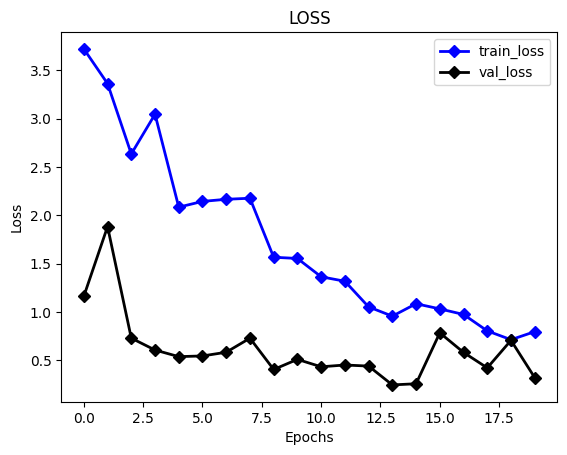

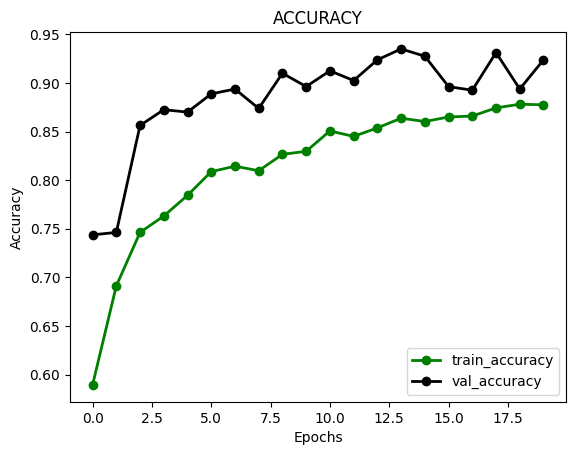

In [49]:
plot_loss_accuracy_graph(log)

In [50]:
result_score = model.evaluate(x_test, y_test)

print('検証誤差:', result_score[0])
print('検証正確率:', result_score[1])

19/19 [==============================] - 0s 2ms/step - loss: 0.3364 - acc: 0.9218
検証誤差: 0.3363691568374634
検証正確率: 0.921796977519989
